In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
df = pd.read_excel (r'D:\Universitas Indonesia\Semester 6\Pemodelan dan Pembelajaran Mesin\Code\3.Linear Regression\Dataset.xlsx')

x = df.iloc[:, 2:8]
y = df.iloc[:, 1:2]

x = preprocessing.scale(x)
y = preprocessing.scale(y)

# x = x.to_numpy()
# y = y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

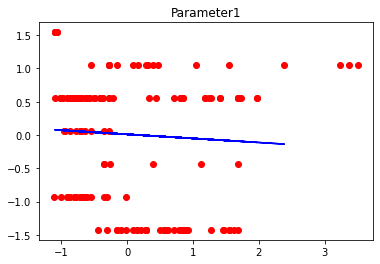

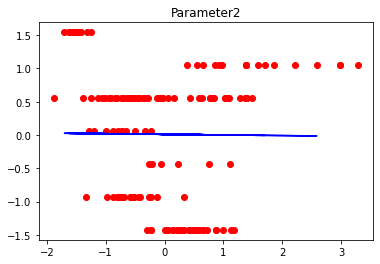

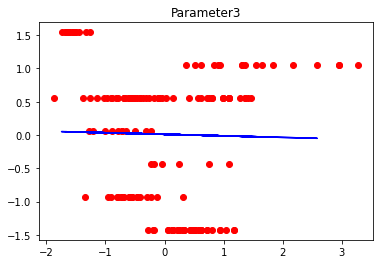

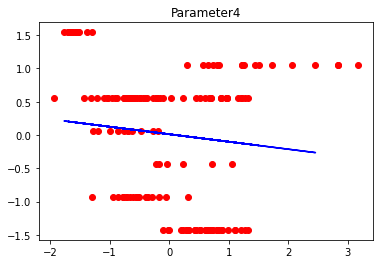

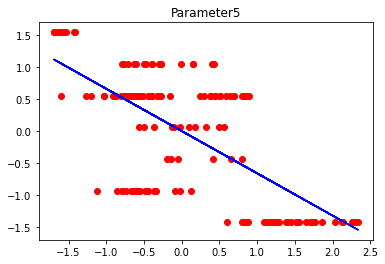

In [17]:
#Linear Regressiuon for each parameter
lr = linear_model.LinearRegression(normalize=True)

lr_r2 = []
lr_error = []

for i in range(0,5):
    X = x[:,i]
    X = X.reshape(-1,1)
    lr_x_train, lr_x_test, lr_y_train, lr_y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    lr.fit(lr_x_train,lr_y_train)

    score_r2 = lr.score(lr_x_train, lr_y_train)
    score_error_train = mean_squared_error(lr_y_train,lr.predict(lr_x_train),squared=False)
    score_error_test = mean_squared_error(lr_y_test,lr.predict(lr_x_test),squared=False)
    lr_r2.append((i+1, score_r2))
    lr_error.append((i+1,score_error_train ,score_error_test))

    #Plot Linear
    fig, ax = plt.subplots()
    ax.scatter(X,y,color='red');
    ax.plot(lr_x_test, lr.predict(lr_x_test),color='blue');
    title = "Parameter" + str((i+1))
    ax.set(title=title);

lr_r2 = np.asarray(lr_r2)
lr_error = np.asarray(lr_error)  

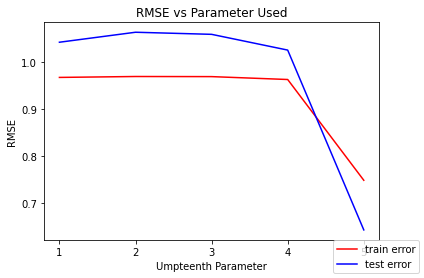

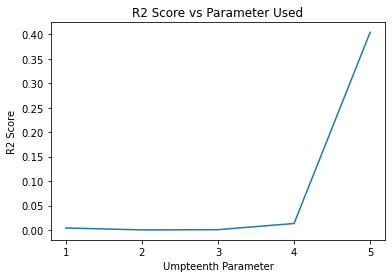

In [18]:
fig, ax = plt.subplots()
ax.plot(lr_error[:,0], lr_error[:,1],color='red');
ax.plot(lr_error[:,0], lr_error[:,2],color='blue');
fig.legend(["train error","test error"],loc="lower right")
ax.xaxis.set_ticks(np.arange(1, 6, 1))
ax.set(xlabel='Umpteenth Parameter', ylabel='RMSE', title='RMSE vs Parameter Used');

fig, ax = plt.subplots()
ax.plot(lr_r2[:,0], lr_r2[:,1]);
ax.xaxis.set_ticks(np.arange(1, 6, 1))
ax.set(xlabel='Umpteenth Parameter', ylabel='R2 Score', title='R2 Score vs Parameter Used');

In [19]:
#Multivariate Linear Regression
mlr = linear_model.LinearRegression(normalize=True)
mlr.fit(x_train,y_train)

print('Multivariate Linear Regression Train R2 Score : %.2f' % mlr.score(x_train, y_train))
print('Multivariate Linear Regression Test R2 Score : %.2f' % mlr.score(x_test, y_test))
print('Multivariate Linear Regression Train Error : %.2f'% mean_squared_error(y_train,mlr.predict(x_train),squared=False))
print('Multivariate Linear Regression Test Error : %.2f'% mean_squared_error(y_test,mlr.predict(x_test),squared=False))

Multivariate Linear Regression Train R2 Score : 0.81
Multivariate Linear Regression Test R2 Score : 0.88
Multivariate Linear Regression Train Error : 0.42
Multivariate Linear Regression Test Error : 0.37


In [29]:
#Polynomial Regression
poly_r2 = []
poly_error = []

for i in range (1,6): 
    poly = preprocessing.PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x_train)
    
    poly.fit(x_poly, y_train)
    polylr = linear_model.LinearRegression(normalize=True)
    polylr.fit(x_poly, y_train)
    y_pred = polylr.predict(poly.fit_transform(x_test))

    score_r2 = polylr.score(x_poly, y_train)
    score_error_train = mean_squared_error(y_train, polylr.predict(poly.fit_transform(x_train)), squared=False)
    score_error_test = mean_squared_error(y_test,   polylr.predict(poly.fit_transform(x_test)),  squared=False)
    poly_r2.append((i, score_r2))
    poly_error.append((i,score_error_train ,score_error_test))

poly_r2 = np.asarray(poly_r2)
poly_error = np.asarray(poly_error)  

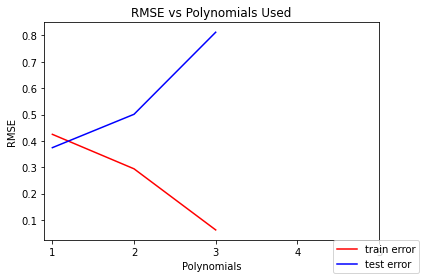

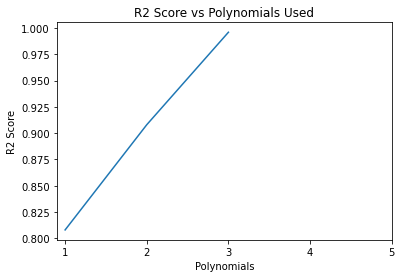

In [30]:
fig, ax = plt.subplots()
ax.plot(poly_error[:,0], poly_error[:,1],color='red');
ax.plot(poly_error[:,0], poly_error[:,2],color='blue');
fig.legend(["train error","test error"],loc="lower right")
ax.xaxis.set_ticks(np.arange(1, 6, 1))
ax.set(xlabel='Polynomials', ylabel='RMSE', title='RMSE vs Polynomials Used');

fig, ax = plt.subplots()
ax.plot(poly_r2[:,0], poly_r2[:,1]);
ax.xaxis.set_ticks(np.arange(1, 6, 1))
ax.set(xlabel='Polynomials', ylabel='R2 Score', title='R2 Score vs Polynomials Used');